In [1]:
import numpy as np
import pandas as pd

# repeatability
np.random.seed(42)

# Number of subscribers
N = 40000

# 1) SUBSCRIBER SEGMENTS (hidden ground truth, realistic mixture)
# These represent the "real underlying" behavioural groups we will later rediscover through clustering.
segments = np.random.choice(
    ["heavy_data", "balanced", "voice_only", "dormant", "night_surfers", "high_value"],
    size=N,
    p=[0.22, 0.28, 0.12, 0.18, 0.10, 0.10]   # realistic population distribution
)

# Prepare storage
data = []

for seg in segments:
    if seg == "heavy_data":
        monthly_data = np.random.gamma(7, 1500)           # 20–80GB
        voice_minutes = np.random.gamma(2, 40)            # low voice
        sms = np.random.poisson(3)                        # low SMS
        recharge_amount = np.random.gamma(3, 1500)        # medium–high spend
        recharge_count = np.random.poisson(4)
        night_data = monthly_data * np.random.uniform(0.05, 0.20)
        peak_data = monthly_data * np.random.uniform(0.60, 0.90)
        weekend_ratio = np.random.uniform(0.25, 0.50)
        failed_calls = np.random.poisson(1)
        device_type = np.random.choice(["Android", "iPhone"], p=[0.8, 0.2])

    elif seg == "balanced":
        monthly_data = np.random.gamma(5, 800)            # 5–25GB
        voice_minutes = np.random.gamma(3, 60)            # moderate
        sms = np.random.poisson(5)
        recharge_amount = np.random.gamma(3, 1000)
        recharge_count = np.random.poisson(3)
        night_data = monthly_data * np.random.uniform(0.10, 0.25)
        peak_data = monthly_data * np.random.uniform(0.50, 0.75)
        weekend_ratio = np.random.uniform(0.20, 0.40)
        failed_calls = np.random.poisson(1)
        device_type = np.random.choice(["Android", "iPhone"], p=[0.85, 0.15])

    elif seg == "voice_only":
        monthly_data = np.random.gamma(2, 300)            # 0.5–2GB
        voice_minutes = np.random.gamma(6, 80)            # high voice usage
        sms = np.random.poisson(10)
        recharge_amount = np.random.gamma(2, 800)
        recharge_count = np.random.poisson(5)
        night_data = monthly_data * np.random.uniform(0.02, 0.10)
        peak_data = monthly_data * np.random.uniform(0.50, 0.80)
        weekend_ratio = np.random.uniform(0.10, 0.30)
        failed_calls = np.random.poisson(2)
        device_type = np.random.choice(["Android", "Feature Phone"], p=[0.6, 0.4])

    elif seg == "dormant":
        monthly_data = np.random.gamma(1.5, 100)          # extremely low usage
        voice_minutes = np.random.gamma(1.5, 20)
        sms = np.random.poisson(1)
        recharge_amount = np.random.gamma(1.2, 500)
        recharge_count = np.random.poisson(1)
        night_data = monthly_data * np.random.uniform(0.0, 0.05)
        peak_data = monthly_data * np.random.uniform(0.30, 0.70)
        weekend_ratio = np.random.uniform(0.05, 0.20)
        failed_calls = np.random.poisson(0.5)
        device_type = np.random.choice(["Android", "Feature Phone"], p=[0.5, 0.5])

    elif seg == "night_surfers":
        monthly_data = np.random.gamma(4, 1200)           # medium-high data
        voice_minutes = np.random.gamma(1.5, 30)
        sms = np.random.poisson(2)
        recharge_amount = np.random.gamma(2.5, 800)
        recharge_count = np.random.poisson(2)
        night_data = monthly_data * np.random.uniform(0.35, 0.60)  # main feature
        peak_data = monthly_data * np.random.uniform(0.20, 0.45)
        weekend_ratio = np.random.uniform(0.30, 0.60)
        failed_calls = np.random.poisson(1)
        device_type = np.random.choice(["Android", "iPhone"], p=[0.9, 0.1])

    elif seg == "high_value":
        monthly_data = np.random.gamma(6, 2000)           # 30–100GB
        voice_minutes = np.random.gamma(4, 70)
        sms = np.random.poisson(8)
        recharge_amount = np.random.gamma(4, 3000)        # very high ARPU
        recharge_count = np.random.poisson(6)
        night_data = monthly_data * np.random.uniform(0.10, 0.25)
        peak_data = monthly_data * np.random.uniform(0.55, 0.85)
        weekend_ratio = np.random.uniform(0.20, 0.40)
        failed_calls = np.random.poisson(1)
        device_type = np.random.choice(["Android", "iPhone"], p=[0.7, 0.3])

    data.append([
        monthly_data, voice_minutes, sms, recharge_amount, recharge_count,
        night_data, peak_data, weekend_ratio, failed_calls, seg, device_type
    ])

# dataset
columns = [
    "monthly_data_mb", "monthly_voice_minutes", "monthly_sms",
    "recharge_amount", "recharge_count", "night_data_mb", "peak_data_mb",
    "weekend_usage_ratio", "num_failed_calls", "true_segment", "device_type"
]

df = pd.DataFrame(data, columns=columns)

# Shuffle rows (to hide pattern)
df = df.sample(frac=1).reset_index(drop=True)

df.to_csv("telecom_subscribers_40000.csv", index=False)

df.head()


,monthly_data_mb,monthly_voice_minutes,monthly_sms,recharge_amount,recharge_count,night_data_mb,peak_data_mb,weekend_usage_ratio,num_failed_calls,true_segment,device_type
0,288.579629,19.625601,1,95.654142,3,9.175446,160.980277,0.132585,0,dormant,Android
1,19211.413107,43.130925,2,1040.994713,6,2702.796514,15203.759453,0.461116,0,heavy_data,iPhone
2,244.494692,29.371411,1,1482.885276,0,4.366384,84.745985,0.089846,1,dormant,Android
3,3328.595559,239.165764,9,1734.332459,4,546.250417,1922.652008,0.344960,0,balanced,Android
4,10101.394274,229.149297,9,21570.384434,3,1101.452973,6369.934547,0.387424,1,high_value,Android


In [2]:
df.head()
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthly_data_mb        40000 non-null  float64
 1   monthly_voice_minutes  40000 non-null  float64
 2   monthly_sms            40000 non-null  int64  
 3   recharge_amount        40000 non-null  float64
 4   recharge_count         40000 non-null  int64  
 5   night_data_mb          40000 non-null  float64
 6   peak_data_mb           40000 non-null  float64
 7   weekend_usage_ratio    40000 non-null  float64
 8   num_failed_calls       40000 non-null  int64  
 9   true_segment           40000 non-null  object 
 10  device_type            40000 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 3.4+ MB


,count,mean,std,min,25%,50%,75%,max
monthly_data_mb,40000.0,5206.229551,5079.292458,0.323715,582.440676,3934.103449,8051.284965,42451.373184
monthly_voice_minutes,40000.0,164.091135,173.394062,0.024772,39.165454,101.745450,230.244942,1371.709398
monthly_sms,40000.0,4.457650,3.581973,0.000000,2.000000,4.000000,7.000000,22.000000
recharge_amount,40000.0,3527.098188,3982.269321,0.454859,1038.601841,2321.442297,4413.027118,49532.206456
recharge_count,40000.0,3.305675,2.367663,0.000000,1.000000,3.000000,5.000000,18.000000
night_data_mb,40000.0,926.219918,1000.344360,0.000062,31.530348,674.956142,1384.592846,10172.427945
peak_data_mb,40000.0,3490.199297,3805.658776,0.192472,358.544919,2119.937204,5527.943309,28944.709651
weekend_usage_ratio,40000.0,0.287834,0.118141,0.050048,0.203610,0.289214,0.368853,0.599912
num_failed_calls,40000.0,1.029025,1.101028,0.000000,0.000000,1.000000,2.000000,10.000000


In [3]:
df.isnull().sum()


,0
monthly_data_mb,0
monthly_voice_minutes,0
monthly_sms,0
recharge_amount,0
recharge_count,0
night_data_mb,0
peak_data_mb,0
weekend_usage_ratio,0
num_failed_calls,0
true_segment,0


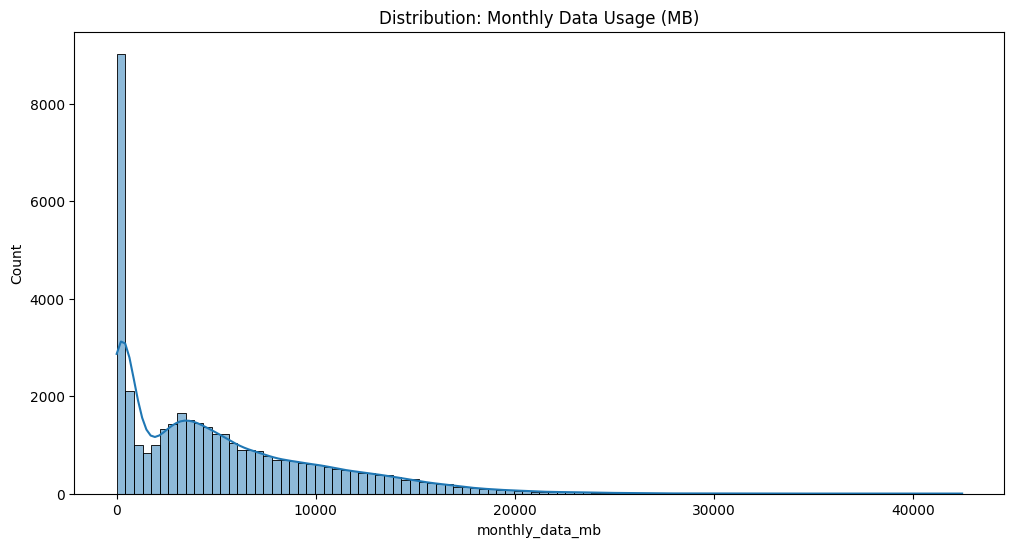

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df['monthly_data_mb'], kde=True)
plt.title("Distribution: Monthly Data Usage (MB)")
plt.show()

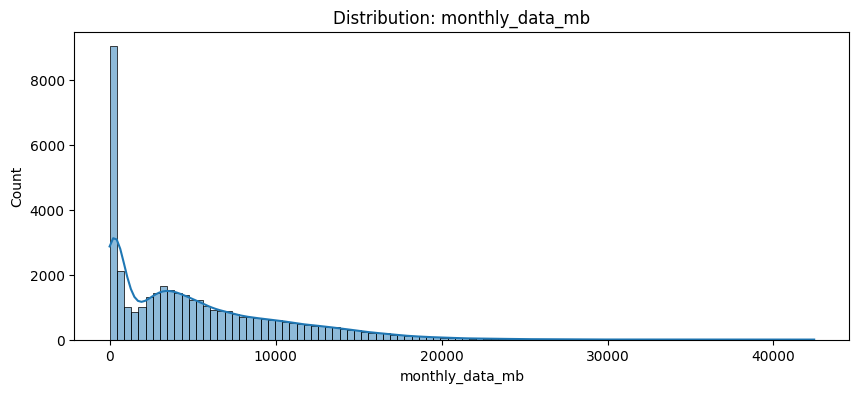

In [ ]:
cols = [
    "monthly_data_mb", "monthly_voice_minutes", "monthly_sms",
    "recharge_amount", "recharge_count",
    "night_data_mb", "peak_data_mb",
    "weekend_usage_ratio", "num_failed_calls"
]

for col in cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution: {col}")
    plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
sns.pairplot(
    df.sample(3000),
    vars=["monthly_data_mb", "monthly_voice_minutes", "recharge_amount", "night_data_mb"],
    hue="true_segment",
    corner=True
)


In [ ]:
df["arpu"] = df["recharge_amount"]


In [ ]:
df["night_ratio"] = df["night_data_mb"] / (df["monthly_data_mb"] + 1)
df["peak_ratio"] = df["peak_data_mb"] / (df["monthly_data_mb"] + 1)



In [ ]:
df["usage_intensity"] = df["monthly_data_mb"] / (df["recharge_amount"] + 1)


In [ ]:
df["voice_data_ratio"] = df["monthly_voice_minutes"] / (df["monthly_data_mb"] + 1)


In [ ]:
df["weekday_usage_ratio"] = 1 - df["weekend_usage_ratio"]


In [ ]:
skewed_cols = ["monthly_data_mb", "recharge_amount", "night_data_mb", "peak_data_mb"]

for col in skewed_cols:
    df[f"log_{col}"] = np.log1p(df[col])


In [ ]:
features = [
    "log_monthly_data_mb",
    "monthly_voice_minutes",
    "monthly_sms",
    "log_recharge_amount",
    "recharge_count",
    "night_ratio",
    "peak_ratio",
    "usage_intensity",
    "voice_data_ratio",
    "weekend_usage_ratio",
    "weekday_usage_ratio",
    "num_failed_calls"
]



In [24]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

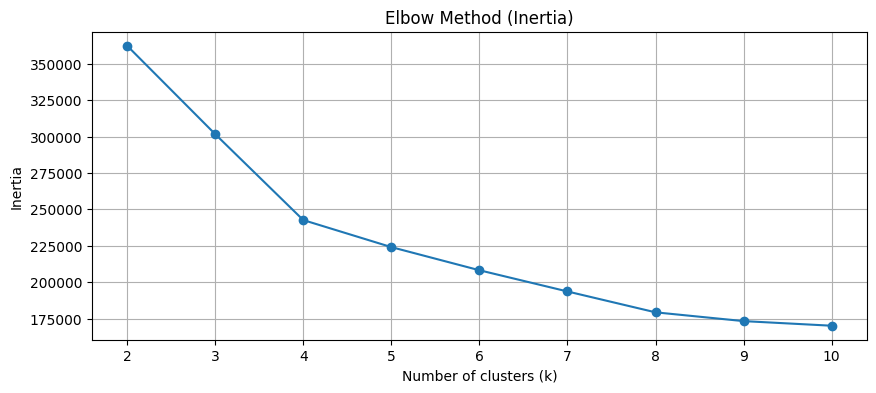

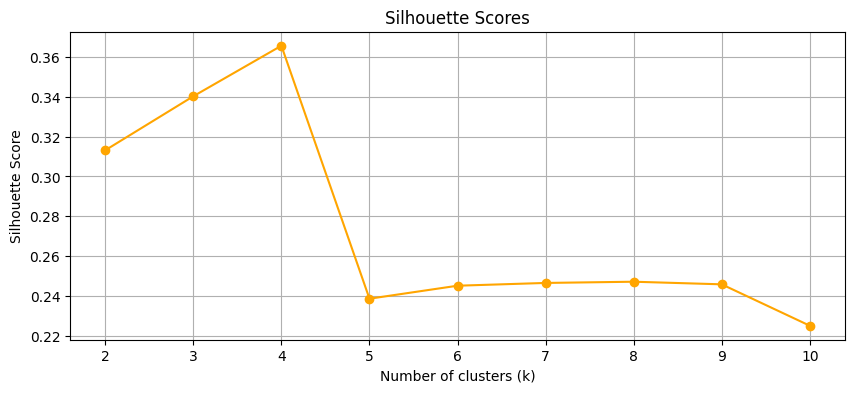

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []
K_range = range(2, 11)  # Test between 2 and 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)

    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot inertia (Elbow)
plt.figure(figsize=(10,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10,4))
plt.plot(K_range, sil_scores, marker='o', color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [25]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [18]:
unscaled_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)

unscaled_centers


,log_monthly_data_mb,monthly_voice_minutes,monthly_sms,log_recharge_amount,recharge_count,night_ratio,peak_ratio,usage_intensity,voice_data_ratio,weekend_usage_ratio,weekday_usage_ratio,num_failed_calls
0,8.739148,157.604605,4.745528,8.216026,3.855757,0.156428,0.683434,2.415993,0.034362,0.327318,0.672682,0.987486
1,4.667683,30.283019,1.020697,5.936145,1.000833,0.024670,0.492228,0.919720,0.474986,0.125950,0.874050,0.500347
2,8.342352,45.931333,1.995988,7.387835,2.005767,0.474613,0.328664,4.130943,0.012780,0.452346,0.547654,0.981194
3,6.215469,481.949937,9.999600,7.167151,5.041408,0.063756,0.648635,0.742833,1.509214,0.201628,0.798372,2.026405


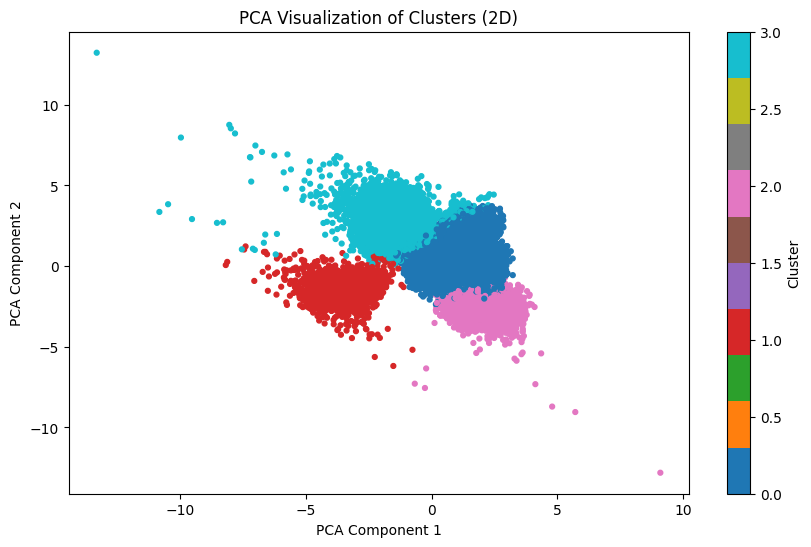

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='tab10', s=12)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Clusters (2D)")
plt.colorbar(scatter, label='Cluster')
plt.show()


# Cluster Interpretation Summary

Below is a detailed breakdown of the four subscriber segments identified from the K-Means clustering model. Each cluster is described using its behavioural characteristics, interpretation, and actionable recommendations relevant to telecom operators.

---

## Cluster 0 — High-Value Heavy Data Streamers

### Key Characteristics
- Very high data usage (log data ≈ 8.74)
- Moderate voice usage (157 minutes per month)
- High peak-hour usage (0.68 peak ratio)
- High recharge amounts (log recharge ≈ 8.21)
- Low voice-to-data ratio (0.034)
- High usage intensity (large data consumed per recharge value)

### Interpretation
These subscribers consume a significant amount of data, especially during peak hours. They likely engage heavily in video streaming, social media, online gaming, and other data-intensive activities.  

This is one of the highest revenue and highest network load segments.

### Segment Name
**High-Value Heavy Data Streamers**

### Recommended Business Actions
- Promote high-volume or unlimited data bundles
- Prioritize 4G and 5G capacity expansion in areas where this segment is concentrated
- Offer premium streaming partnerships (YouTube, TikTok, Netflix, Showmax)
- Target with device financing for high-end smartphones

---

## Cluster 1 — Low-Usage, Low-ARPU Casual Users

### Key Characteristics
- Very low data usage (log 4.67)
- Very low voice usage (30 minutes per month)
- Very low recharge activity (1 recharge per month)
- Very low weekend usage (0.12)
- Low night and peak usage ratios

### Interpretation
This segment includes the lightest users on the network. They rarely recharge and show minimal engagement with both voice and data services.  

They may include:
- Secondary SIM users  
- Low-income prepaid customers  
- Inactive or dormant subscribers  
- Potential churn risks  

### Segment Name
**Low-Usage Casual / Dormant Users**

### Recommended Business Actions
- Reactivation and win-back campaigns
- Introduce low-price micro-bundles (daily or hourly plans)
- Offer first recharge bonuses or loyalty points
- Run SIM consolidation campaigns encouraging primary SIM usage

---

## Cluster 2 — Night Surfers and Value Seekers

### Key Characteristics
- High data usage (log 8.34)
- Low voice usage (45 minutes per month)
- Very high night usage ratio (0.47)
- Highest usage intensity (4.13)
- High weekend usage ratio (0.45)
- Very low voice-to-data ratio (0.013)

### Interpretation
This segment uses the network heavily at night, likely taking advantage of discounted off-peak data bundles. They consume the most data relative to how much they recharge, indicating high price sensitivity.

Common personas include:
- Students  
- Young adults  
- Online gamers  
- Users of night-only or weekend data plans  

### Segment Name
**Night Surfers / Data Value Seekers**

### Recommended Business Actions
- Offer larger or unlimited night bundles
- Promote off-peak data packs to boost utilization
- Cross-sell weekend streaming bundles
- Keep prices affordable to retain this high-usage, low-ARPU group

---

## Cluster 3 — Voice-Centric Traditional Users

### Key Characteristics
- Extremely high voice usage (482 minutes per month)
- Highest SMS usage (10 messages per month)
- Highest recharge frequency (5 times per month)
- Very high voice-to-data ratio (1.5)
- Moderate data usage (log 6.21)
- Highest failed call count (2.03)

### Interpretation
These subscribers rely primarily on voice services rather than data. They utilize SMS more than other clusters and frequently recharge small amounts. This is a classic “traditional telecom user” segment.

Typical users include:
- Older customers  
- Feature phone users  
- Small business owners  
- Rural or suburban subscribers with low smartphone penetration  

### Segment Name
**Voice-Centric Traditional Users**

### Recommended Business Actions
- Promote affordable and unlimited voice bundles
- Push VoLTE adoption for improved call quality
- Address call failure issues through targeted radio/network optimization
- Reward loyalty with voice-oriented promotions and bonuses


# Cluster Profile Summary

| Cluster | Segment Name                       | Data (log) | Voice (min) | SMS | Recharge (log) | Recharge Count | Night Ratio | Peak Ratio | Usage Intensity | Voice/Data Ratio | Weekend Usage | Failed Calls |
|---------|--------------------------------------|------------|-------------|-----|-----------------|-----------------|--------------|------------|------------------|------------------|----------------|--------------|
| 0       | High-Value Heavy Data Streamers       | 8.74       | 157.60      | 4.75| 8.21            | 3.86            | 0.16         | 0.68       | 2.42             | 0.03             | 0.33           | 0.99         |
| 1       | Low-Usage Casual / Dormant Users      | 4.67       | 30.28       | 1.02| 5.94            | 1.00            | 0.02         | 0.49       | 0.92             | 0.48             | 0.13           | 0.50         |
| 2       | Night Surfers / Value Seekers         | 8.34       | 45.93       | 2.00| 7.39            | 2.01            | 0.47         | 0.33       | 4.13             | 0.01             | 0.45           | 0.98         |
| 3       | Voice-Centric Traditional Users        | 6.22       | 481.95      | 10.00| 7.17           | 5.04            | 0.06         | 0.65       | 0.74             | 1.51             | 0.20           | 2.03         |


In [20]:
# Map the segment names
segment_map = {
    0: "High-Value Heavy Data Streamers",
    1: "Low-Usage Casual / Dormant Users",
    2: "Night Surfers / Value Seekers",
    3: "Voice-Centric Traditional Users"
}

df["segment_name"] = df["cluster"].map(segment_map)

# Select ONLY interpretable, unscaled features
final_df = df[[
    "monthly_data_mb",
    "monthly_voice_minutes",
    "monthly_sms",
    "recharge_amount",
    "recharge_count",
    "night_ratio",
    "peak_ratio",
    "usage_intensity",
    "voice_data_ratio",
    "weekend_usage_ratio",
    "weekday_usage_ratio",
    "num_failed_calls",
    "cluster",
    "segment_name",
    "pca1",
    "pca2"
]]

final_df.to_csv("telecom_clusters_final.csv", index=False)
final_df.head()


,monthly_data_mb,monthly_voice_minutes,monthly_sms,recharge_amount,recharge_count,night_ratio,peak_ratio,usage_intensity,voice_data_ratio,weekend_usage_ratio,weekday_usage_ratio,num_failed_calls,cluster,segment_name,pca1,pca2
0,288.579629,19.625601,1,95.654142,3,0.031685,0.555910,2.985693,0.067773,0.132585,0.867415,0,1,Low-Usage Casual / Dormant Users,-2.960845,-1.495258
1,19211.413107,43.130925,2,1040.994713,6,0.140680,0.791351,18.437150,0.002245,0.461116,0.538884,0,0,High-Value Heavy Data Streamers,2.748465,-1.189614
2,244.494692,29.371411,1,1482.885276,0,0.017786,0.345205,0.164767,0.119642,0.089846,0.910154,1,1,Low-Usage Casual / Dormant Users,-3.084425,-1.467922
3,3328.595559,239.165764,9,1734.332459,4,0.164059,0.577443,1.918131,0.071830,0.344960,0.655040,0,0,High-Value Heavy Data Streamers,0.640748,0.461692
4,10101.394274,229.149297,9,21570.384434,3,0.109029,0.630537,0.468278,0.022683,0.387424,0.612576,1,0,High-Value Heavy Data Streamers,1.798104,1.230786


In [41]:
import numpy as np
import pandas as pd

def engineer_features(df):
    # Copy to avoid modifying original
    df = df.copy()

    # Ratios
    df["arpu"] = df["recharge_amount"]
    df["night_ratio"] = df["night_data_mb"] / (df["monthly_data_mb"] + 1)
    df["peak_ratio"] = df["peak_data_mb"] / (df["monthly_data_mb"] + 1)
    df["weekend_usage_ratio"] = df["weekend_usage_ratio"]
    df["weekday_usage_ratio"] = 1 - df["weekend_usage_ratio"]

    # Value-seeking metric
    df["usage_intensity"] = df["monthly_data_mb"] / (df["recharge_amount"] + 1)

    # Voice vs data balance
    df["voice_data_ratio"] = df["monthly_voice_minutes"] / (df["monthly_data_mb"] + 1)
    df["log_monthly_data_mb"] = np.log(df["monthly_data_mb"] + 1)
    df["log_recharge_amount"] = np.log(df["recharge_amount"] + 1)

    return df


In [42]:
features = [
    "log_monthly_data_mb",
    "monthly_voice_minutes",
    "monthly_sms",
    "log_recharge_amount",
    "recharge_count",
    "night_ratio",
    "peak_ratio",
    "usage_intensity",
    "voice_data_ratio",
    "weekend_usage_ratio",
    "weekday_usage_ratio",
    "num_failed_calls"
]

In [43]:
import joblib

scaler = joblib.load("scaler.pkl")
kmeans = joblib.load("kmeans_model.pkl")

In [44]:
segment_map = {
    0: "High-Value Heavy Data Streamers",
    1: "Low-Usage Casual / Dormant Users",
    2: "Night Surfers / Value Seekers",
    3: "Voice-Centric Traditional Users"
}


In [45]:
def segment_new_customers(new_df):
    # 1. Feature engineering
    new_df = engineer_features(new_df)

    # 2. Select model features
    X = new_df[features]

    # 3. Scale using TRAINED scaler
    X_scaled = scaler.transform(X)

    # 4. Predict clusters
    new_df["cluster"] = kmeans.predict(X_scaled)

    # 5. Map human-readable segment names
    new_df["segment_name"] = new_df["cluster"].map(segment_map)

    return new_df


In [46]:
new_data = pd.read_csv("/content/new_subscribers_batch.csv")
new_data.head()




,monthly_data_mb,monthly_voice_minutes,monthly_sms,recharge_amount,recharge_count,night_data_mb,peak_data_mb,weekend_usage_ratio,num_failed_calls
0,7053,97,2,6008,1,670,3594,0.554305,2
1,5112,71,0,4712,2,1493,4609,0.621864,0
2,4854,46,2,2710,2,233,2448,0.120697,3
3,4854,78,5,3707,4,1411,3789,0.223977,1
4,11397,204,1,2907,1,1175,2781,0.451397,0


In [47]:
segmented = segment_new_customers(new_data)


In [48]:
# Show preview
segmented.head()

,monthly_data_mb,monthly_voice_minutes,monthly_sms,recharge_amount,recharge_count,night_data_mb,peak_data_mb,weekend_usage_ratio,num_failed_calls,arpu,night_ratio,peak_ratio,weekday_usage_ratio,usage_intensity,voice_data_ratio,log_monthly_data_mb,log_recharge_amount,cluster,segment_name
0,7053,97,2,6008,1,670,3594,0.554305,2,6008,0.094982,0.509498,0.445695,1.173739,0.013751,8.861350,8.701014,0,High-Value Heavy Data Streamers
1,5112,71,0,4712,2,1493,4609,0.621864,0,4712,0.292001,0.901428,0.378136,1.084659,0.013886,8.539542,8.458080,0,High-Value Heavy Data Streamers
2,4854,46,2,2710,2,233,2448,0.120697,3,2710,0.047992,0.504222,0.879303,1.790483,0.009475,8.487764,7.905073,1,Low-Usage Casual / Dormant Users
3,4854,78,5,3707,4,1411,3789,0.223977,1,3707,0.290628,0.780433,0.776023,1.309061,0.016066,8.487764,8.218248,0,High-Value Heavy Data Streamers
4,11397,204,1,2907,1,1175,2781,0.451397,0,2907,0.103088,0.243990,0.548603,3.919188,0.017898,9.341193,7.975221,2,Night Surfers / Value Seekers
